In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
dataset=pd.read_csv('electronics-2.csv')

In [3]:
# list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [4]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [5]:
#shape
dataset.shape

(1292954, 10)

In [6]:
#Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [7]:
#Statistical summary
dataset.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [8]:
#Number of uniques
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
year               20
user_attr           2
split               3
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [13]:
#Distribution of ratings
dataset['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [14]:
# what was the best year of sales
dataset.groupby('year')['rating'].count().sort_values(ascending=False)

year
2015    364004
2014    275194
2013    161695
2012    139154
2011     87695
2016     54598
2009     54333
2010     50315
2008     28520
2007     17989
2006     16336
2005     11577
2017     10429
2004      7195
2018      4624
2003      3949
2000      3572
2002       955
2001       702
1999       118
Name: rating, dtype: int64

In [16]:
# what was the best month of sales
dataset['month']=pd.DatetimeIndex(dataset['timestamp']).month
dataset['month'].value_counts()

month
1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: count, dtype: int64

In [17]:
#Drop all null values
dataset.dropna(inplace=True)


In [18]:
#Check for missing values
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

### FINDING ABSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS

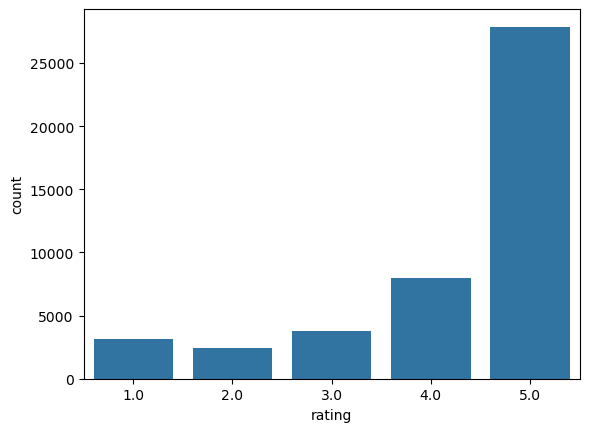

In [19]:
# the distribution of ratings 
sns.countplot(x='rating' ,data=dataset)
plt.show()

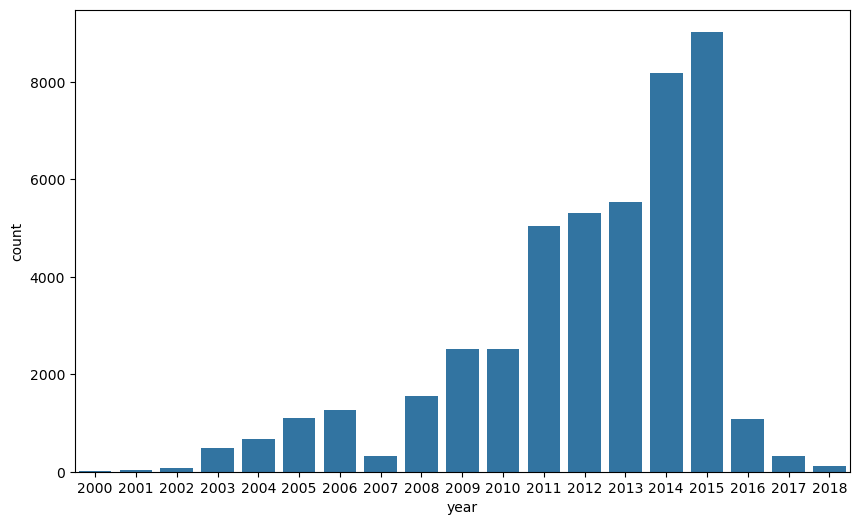

In [23]:
# the distribution of sales by year
plt.subplots(figsize=(10,6))
sns.countplot(x='year' ,data=dataset)
plt.show()

<Axes: xlabel='brand', ylabel='count'>

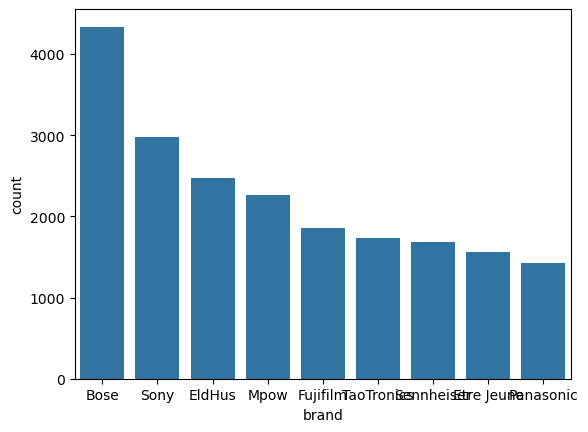

In [44]:
 # brands with the most sales

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

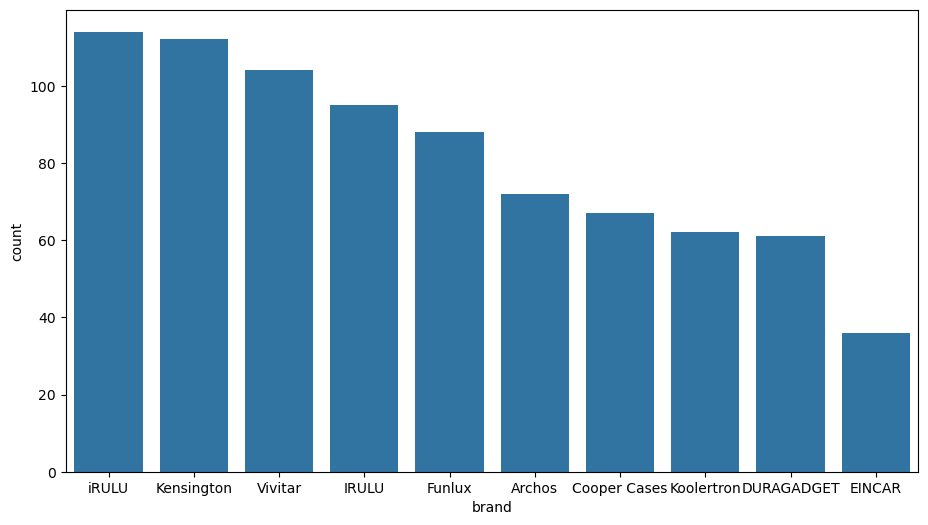

In [47]:
# brands with the least  sales
plt.subplots(figsize=(11,6))
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

<Axes: xlabel='brand', ylabel='count'>

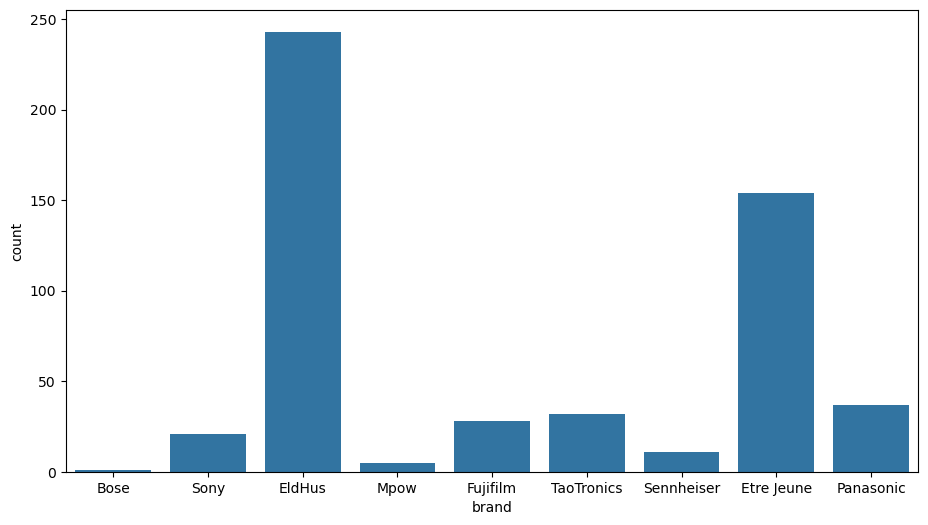

In [60]:
# brands with the most sales in 2016
plt.subplots(figsize=(11,6))
sns.countplot(data=dataset[dataset['year']==2016],x='brand',order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

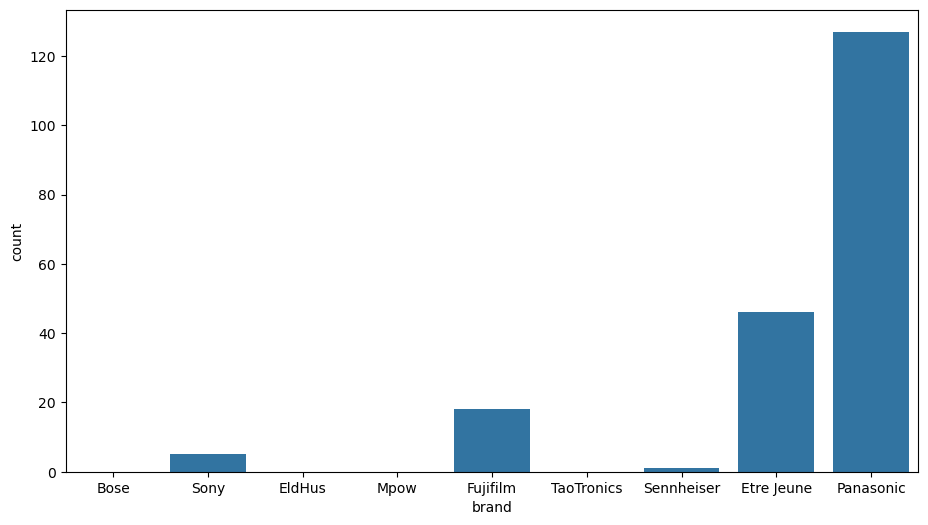

In [64]:

# brands with the most sales in 2017
plt.subplots(figsize=(11,6))
sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

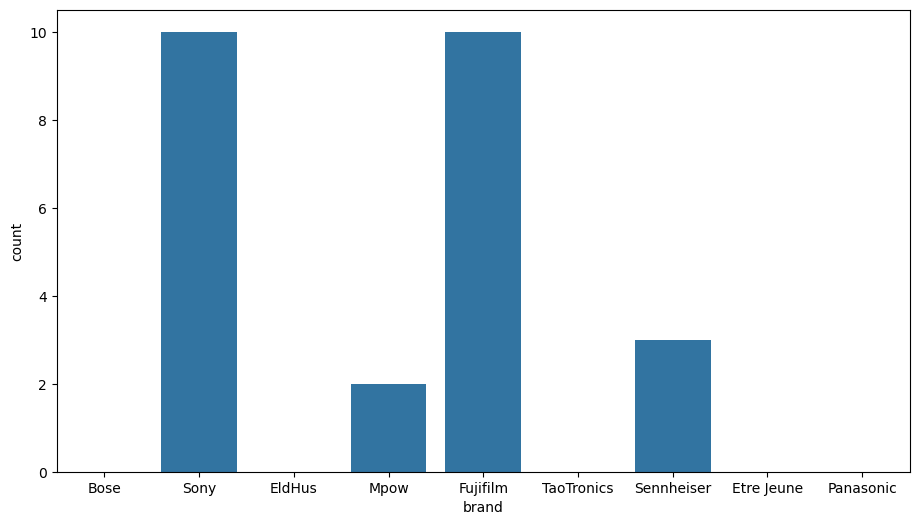

In [65]:

# brands with the most sales in 2018
plt.subplots(figsize=(11,6))
sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)

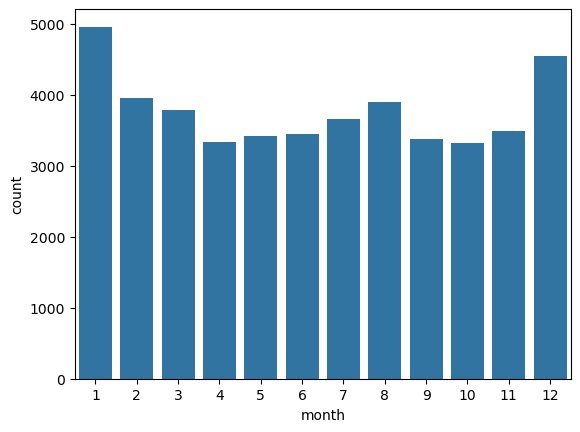

In [67]:
# month with most sales
sns.countplot(x='month', data=dataset)
plt.show()

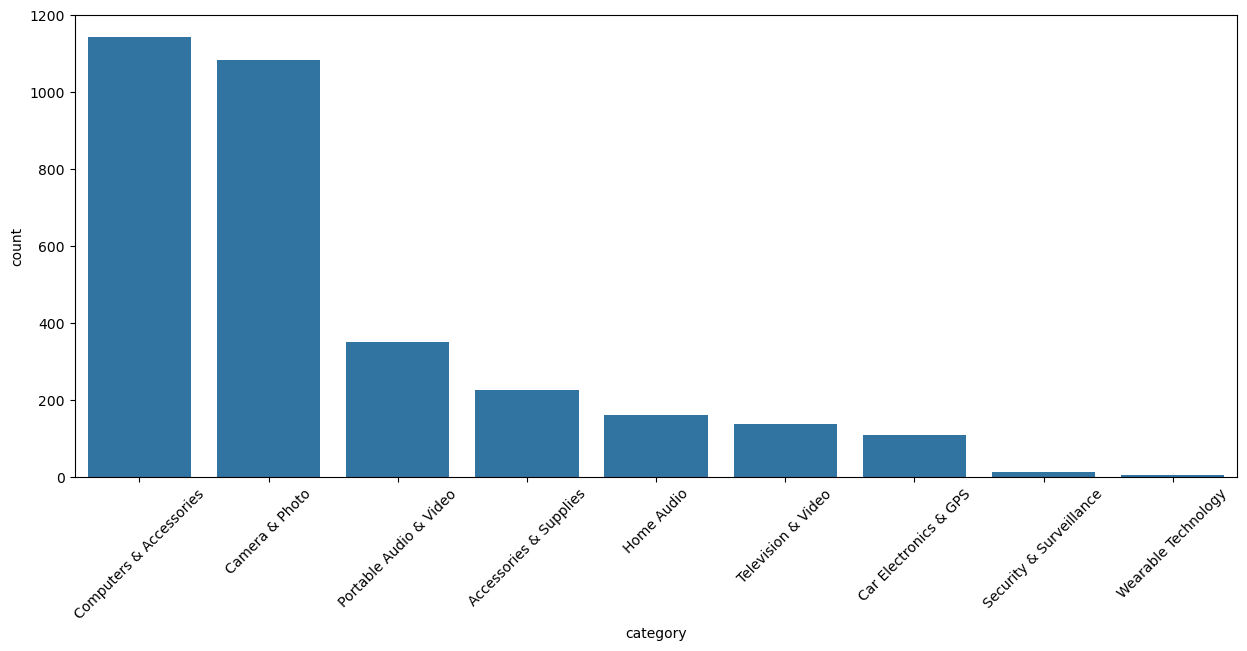

In [74]:
# What products by category were sold the most in January
plt.subplots(figsize=(15,6))
sns.countplot(data=dataset[dataset['month']==1], x='category',order=dataset['category'].value_counts().iloc[1:10].index)
plt.xticks(rotation=45)
plt.show()
              

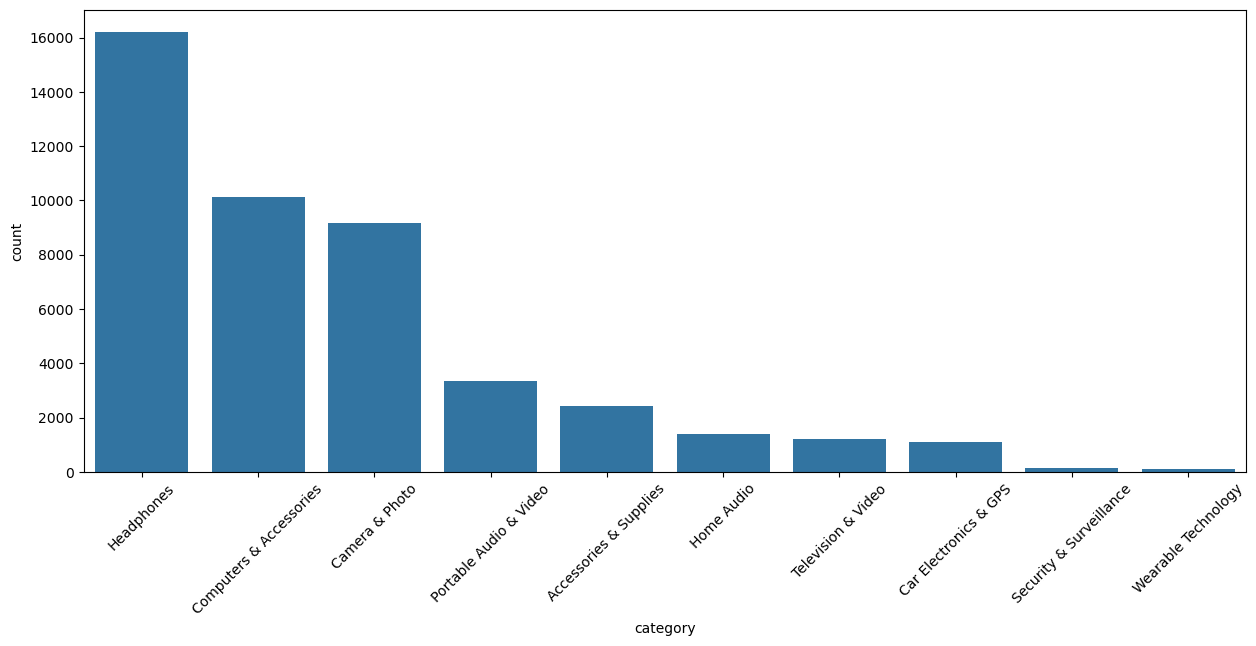

In [77]:
# Category with the least sales
plt.subplots(figsize=(15,6))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='rating'>

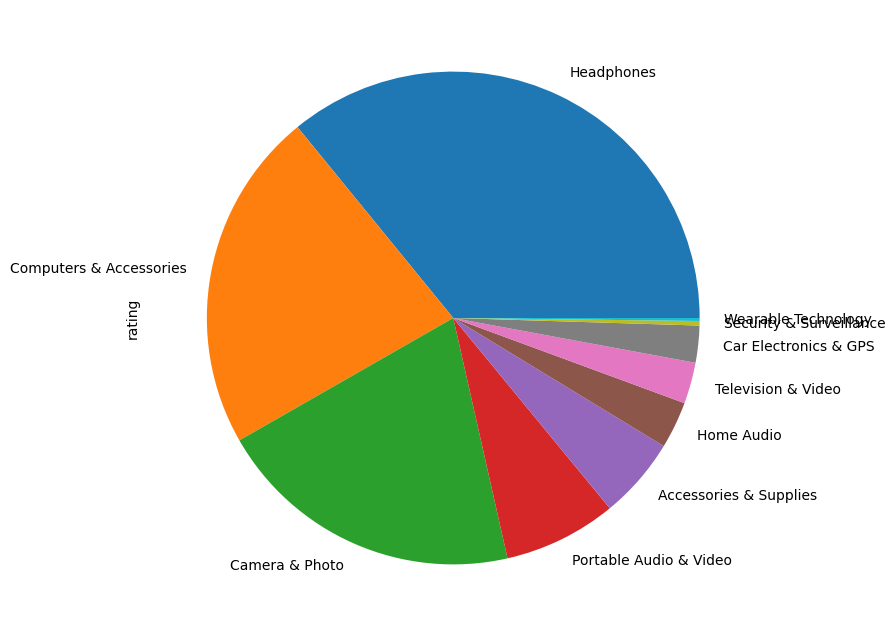

In [84]:
plt.subplots(figsize=(20,8))
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')